In [ ]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
import csv


In [ ]:
dataPath="50_Startups.csv"
df = pd.read_csv(dataPath)

with open(dataPath) as f:
    reader = csv.reader(f)
    i = next(reader)
y_=i[len(i)-1]
i.remove(y_)

x = df.loc[:, i].values
# Separating out the target
y = df.loc[:,y_].values

rmv="selam"
for a in range(len(i)):
    if  len(i[a]) == 0 :
        rmv=i[a]
        print("null değer bulundu")


if len(rmv) == 0 :
    i.remove(rmv)
    print("silindi")

print(i)
y_

['R&D Spend', 'Administration', 'Marketing Spend', 'State']


'Profit'

In [ ]:
for a in range(len(i)):
    if type(x[0,a])== str:
        labelencoder_X = LabelEncoder()
        print(i[a])
        df[i[a]] = labelencoder_X.fit_transform(df[i[a]])


x = df.loc[:, i].values
# Separating out the target
y = df.loc[:,y_].values

State


In [ ]:
from sklearn.preprocessing import StandardScaler
# Separating out the features
x = StandardScaler().fit_transform(x)

#print(x[0,3])
#print(x)


In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=1)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['a'])



In [ ]:
dataset = pd.concat([principalDf, df[[y_]]], axis = 1)


In [ ]:
X=np.array(dataset['a']).reshape(-1,1)
y=np.array(dataset[y_]).reshape(-1,1)

min_max_scaler = MinMaxScaler()
X = min_max_scaler.fit_transform(X)
y = min_max_scaler.fit_transform(y)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)
y_test_pred = model.predict(X_test)

Coefficients(slope of the line): [[0.93682808]]
Mean squared error: 0.01
R-square: 0.84’


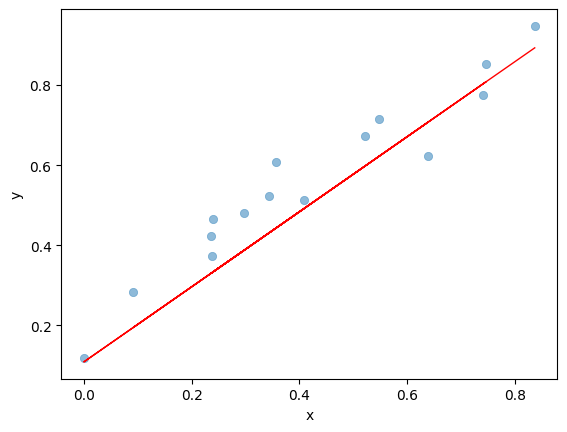

In [ ]:
print("Coefficients(slope of the line):", model.coef_)
print("Mean squared error: %.2f"% mean_squared_error(y_test,y_test_pred))
# c. R-square — how well x accout for the varaince of Y
print("R-square: %.2f’" % r2_score(y_test,y_test_pred))
# Plot the line
plt.scatter(X_test, y_test,linewidth=0.5,alpha=0.5)
plt.plot(X_test, y_test_pred, color='red', linewidth=1)
plt.xlabel('x')
plt.ylabel('y')
#plt.title('Fitted Line:  y = %.2f + %.2f * x'% (model.intercept_, model.coef_))
plt.show()

Coefficients(slope of the line): [[  0.           0.46331906   6.31754856 -20.47880084  25.23121149
  -10.59707704]]
Mean squared error: 0.01
R-square: 0.86’


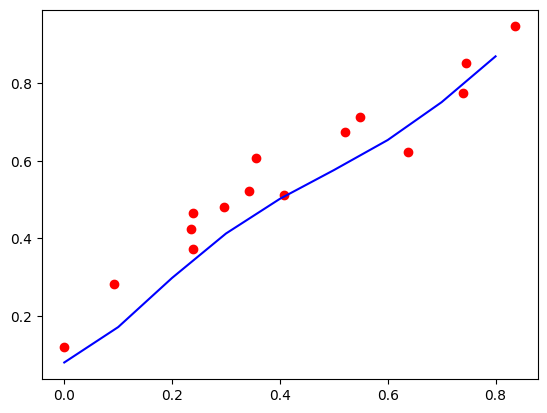

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 5)
#print(X.shape)
#print(X_train.shape)
X_poly = poly_reg.fit_transform(X_train)
#print(X_poly.shape)
poly_reg.fit(X_poly, y_train)
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_poly, y_train)
#print(X_poly.shape)

#print(X_test.shape)
X_grid = np.arange(min(X_test), max(X_test), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))
y_poly_pred=lin_reg_2.predict(poly_reg.fit_transform(X_test))


print("Coefficients(slope of the line):", lin_reg_2.coef_)
print("Mean squared error: %.2f"% mean_squared_error(y_test,y_poly_pred))
# c. R-square — how well x accout for the varaince of Y
print("R-square: %.2f’" % r2_score(y_test,y_poly_pred))

plt.scatter(X_test, y_test, color = 'red')
plt.plot(X_grid, lin_reg_2.predict(poly_reg.fit_transform(X_grid)), color = 'blue')
plt.show()


